In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Loading image dataset

In [9]:
import pathlib
fire_image=["C:/Users/admin/Fire_and_Smoke/fire"]
non_fire=["C:/Users/admin/Fire_and_Smoke/smoke"]
fire_image_path = pathlib.Path(fire_image[0])
non_fire_path = pathlib.Path(non_fire[0])
for path in fire_image[1:]:
    fire_image_path.joinpath(path)
    
for path in non_fire[1:]:
    non_fire_path.joinpath(path)

# Testing and Traning the Data

In [10]:
import glob
from itertools import chain

train_data_imag = {
    "Fire":list(chain(fire_image_path.glob('*.jpg'), fire_image_path.glob('*.png'))),
    "NonFire":list(chain(non_fire_path.glob('*.jpg'), non_fire_path.glob('*.png')))
}
train_labels = {
    "Fire":0,"NonFire":1
}

In [11]:
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [13]:
X, y = [], []
for label, images in train_data_imag.items():
    for image in images:
        img = cv2.imread(str(image)) 
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (180, 180))
            X.append(img)
            y.append(train_labels[label])

# Dataset Split

In [15]:
import numpy
X_samp = numpy.array(X)
y_samp = numpy.array(y)

In [16]:
X_samp = (X_samp/255)

In [17]:
X_samp.shape

(100, 180, 180, 3)

# CNN Implementation

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2)

In [19]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomContrast(0.2),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

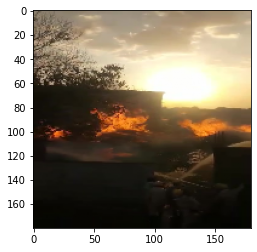

In [20]:
plt.imshow(X_train[0])

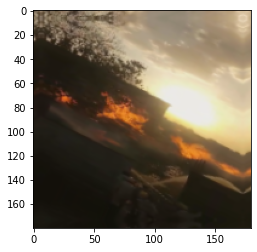

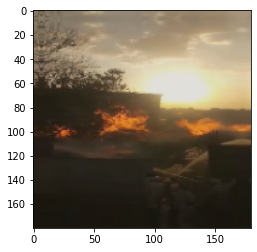

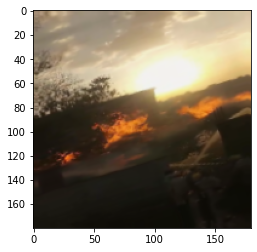

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


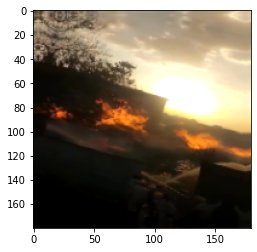

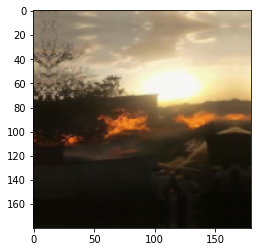

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


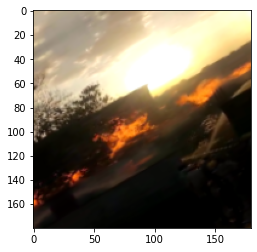

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


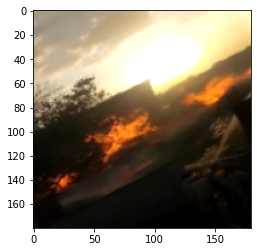

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


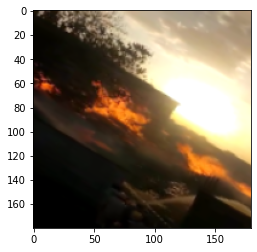

In [21]:
for i in range(8):
    plt.imshow(data_argumentation(X_train[0]))
    plt.show()

# Accuracy Calculation

In [23]:
model1 = keras.Sequential([
    data_argumentation,
    keras.layers.Conv2D(64, (3,3), padding='same', activation="relu", input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), padding='same', activation="softmax"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), padding='same', activation="softmax"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])
model1.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [24]:
model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 11s 2s/step - loss: 0.5614 - accuracy: 0.7750 - val_loss: 0.3821 - val_accuracy: 0.9000
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.5334 - accuracy: 0.7750 - val_loss: 0.3471 - val_accuracy: 0.9000
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.5421 - accuracy: 0.7750 - val_loss: 0.3410 - val_accuracy: 0.9000
Epoch 4/20
3/3 [==============================] - 5s 1s/step - loss: 0.5471 - accuracy: 0.7750 - val_loss: 0.3400 - val_accuracy: 0.9000
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.5479 - accuracy: 0.7750 - val_loss: 0.3413 - val_accuracy: 0.9000
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.5457 - accuracy: 0.7750 - val_loss: 0.3453 - val_accuracy: 0.9000
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.5417 - accuracy: 0.7750 - val_loss: 0.3522 - val_accuracy: 0.9000
Epoch 8/20
3/3 [========================